In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
datasets=pd.read_csv("Housing.csv")

In [4]:
datasets

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
datasets.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
datasets.price.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [7]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
datasets.dropna(inplace=True)

In [9]:
datasets.describe(include='all')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
datasets['mainroad']=le.fit_transform(datasets['mainroad'])
datasets['guestroom']=le.fit_transform(datasets['guestroom'])
datasets['basement']=le.fit_transform(datasets['basement'])
datasets['hotwaterheating']=le.fit_transform(datasets['hotwaterheating'])
datasets['airconditioning']=le.fit_transform(datasets['airconditioning'])
datasets['prefarea']=le.fit_transform(datasets['prefarea'])
datasets['furnishingstatus']=le.fit_transform(datasets['furnishingstatus'])

In [12]:
datasets

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split
X =datasets.drop(['price'],axis=1)
Y=datasets['price']

In [14]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [15]:
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

In [17]:
train_data=X_train.join(Y_train)
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
68,6000,3,1,1,1,0,0,0,1,1,0,0,6860000
101,5500,3,1,3,1,0,0,0,0,1,1,2,6230000
454,4500,3,1,2,1,0,0,0,1,0,0,2,3143000
160,6210,4,1,4,1,1,0,0,1,0,0,0,5460000
32,4880,4,2,2,1,0,0,0,1,1,1,0,8295000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,6254,4,2,1,1,0,1,0,0,1,1,1,5950000
414,4040,2,1,1,1,0,0,0,0,0,0,2,3423000
442,2684,2,1,1,1,0,0,0,1,1,0,2,3220000
220,8100,4,1,4,1,0,1,0,1,2,0,1,4795000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>],
       [<Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'furnishingstatus'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

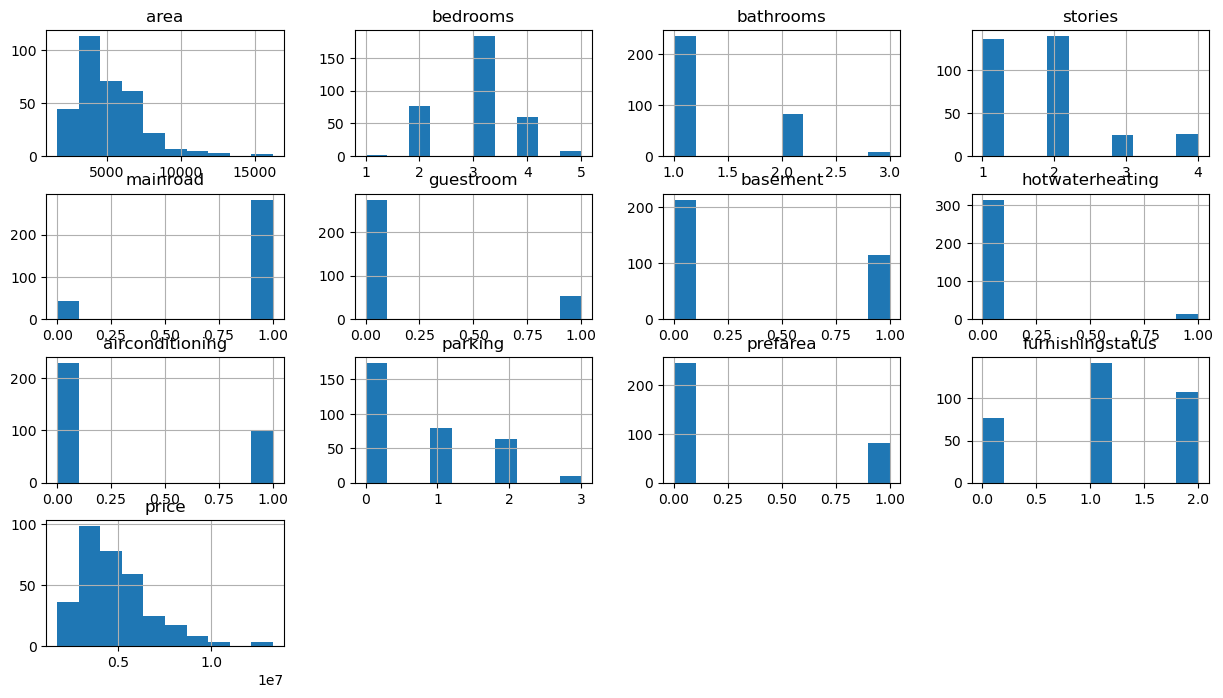

In [18]:
train_data.hist(figsize=(15,8))

In [19]:
train_data.corr()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
area,1.000000,0.228474,0.207196,0.074654,0.285612,0.156305,0.037747,-0.062492,0.211490,0.360475,0.218062,-0.084553,0.553424
bedrooms,0.228474,1.000000,0.415611,0.398858,-0.046067,0.055871,0.087513,0.048168,0.200859,0.148951,0.111433,-0.054644,0.376658
bathrooms,0.207196,0.415611,1.000000,0.289193,0.023217,0.145715,0.119384,-0.028723,0.213775,0.158432,0.062198,-0.067396,0.491444
stories,0.074654,0.398858,0.289193,1.000000,0.089465,-0.019911,-0.202093,0.043099,0.312899,0.036346,0.000886,-0.010318,0.369602
mainroad,0.285612,-0.046067,0.023217,0.089465,1.000000,0.100467,0.062800,-0.057368,0.140578,0.233100,0.205501,-0.130054,0.290037
guestroom,0.156305,0.055871,0.145715,-0.019911,0.100467,1.000000,0.339968,-0.047017,0.147013,0.062116,0.151316,-0.133727,0.236363
basement,0.037747,0.087513,0.119384,-0.202093,0.062800,0.339968,1.000000,0.015368,0.011695,0.090253,0.249177,-0.170353,0.189941
hotwaterheating,-0.062492,0.048168,-0.028723,0.043099,-0.057368,-0.047017,0.015368,1.000000,-0.098942,0.063638,-0.080499,0.016101,0.037650
airconditioning,0.211490,0.200859,0.213775,0.312899,0.140578,0.147013,0.011695,-0.098942,1.000000,0.113574,0.103988,-0.118899,0.474592
parking,0.360475,0.148951,0.158432,0.036346,0.233100,0.062116,0.090253,0.063638,0.113574,1.000000,0.107016,-0.174499,0.385546


<Axes: >

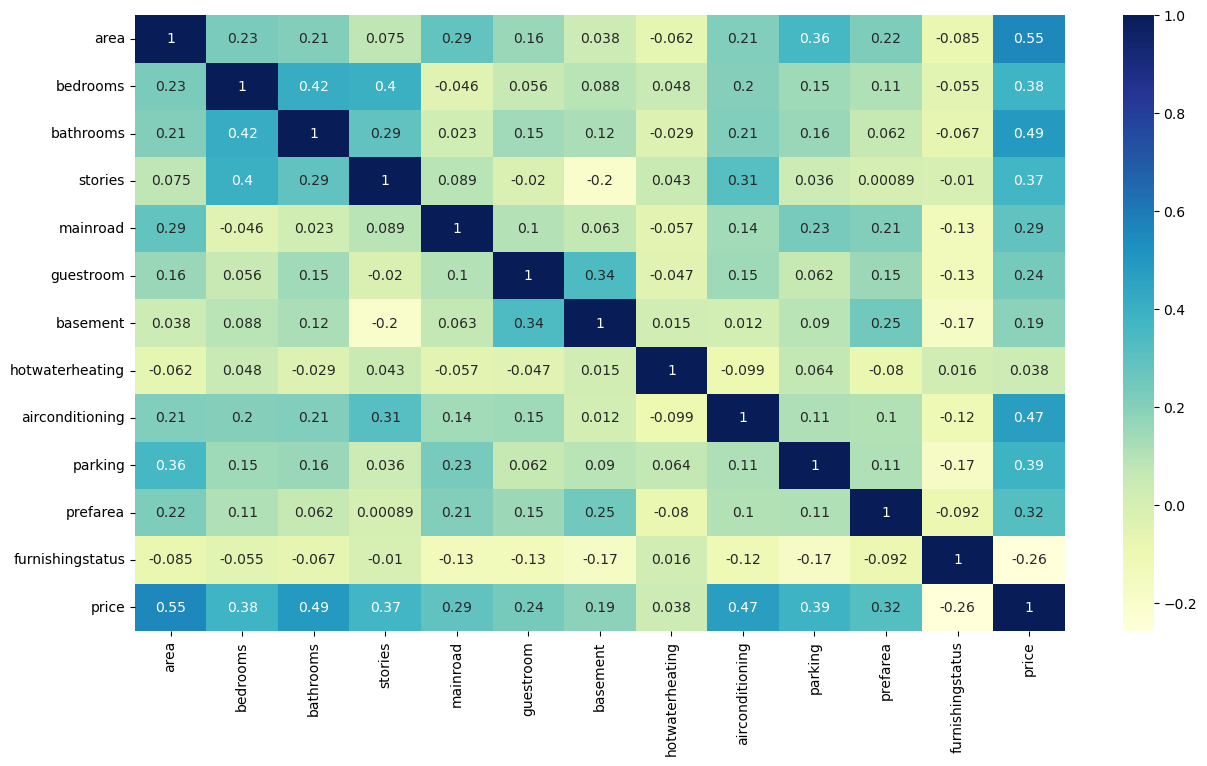

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='area', ylabel='price'>

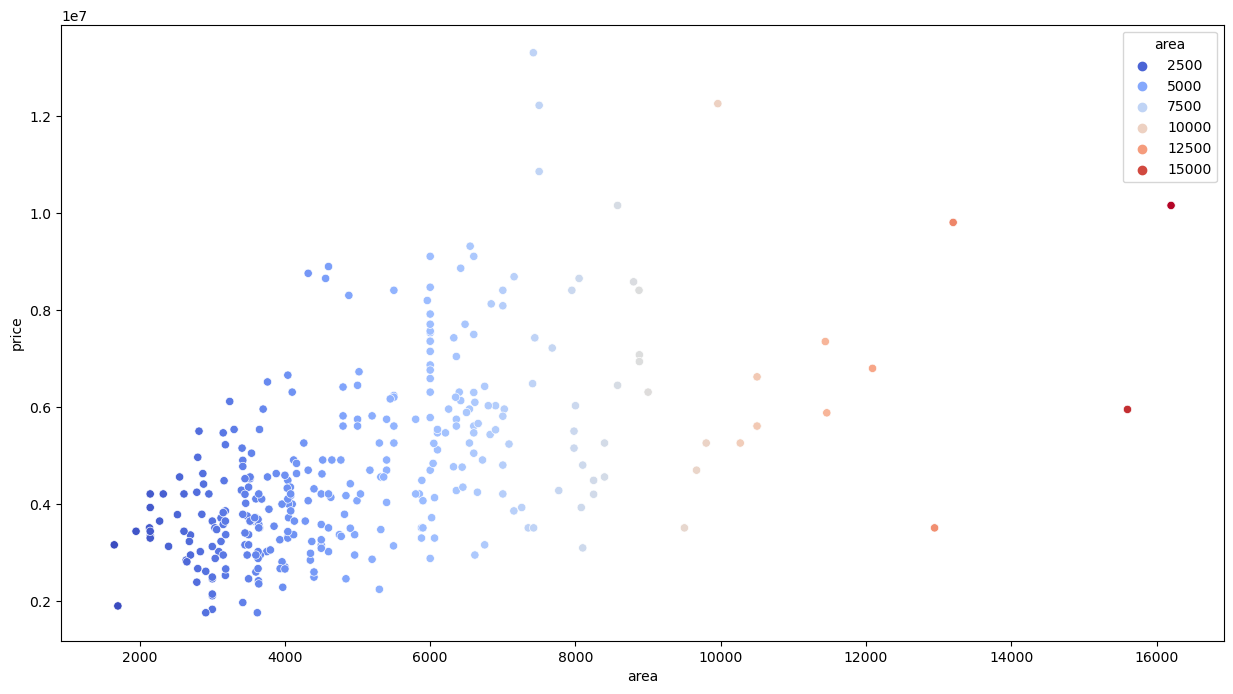

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="area",y="price",data=train_data,hue="area",palette="coolwarm")

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train,Y_train=train_data.drop(['price'],axis=1),train_data['price']

reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [23]:
test_data=X_test.join(Y_test)


In [24]:
test_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
62,6240,4,2,2,1,0,0,0,1,1,0,0,7070000
208,2970,3,1,3,1,0,0,0,0,0,0,1,4900000
502,3480,2,1,1,1,0,0,0,0,1,0,1,2660000
458,3850,3,1,2,1,0,0,0,0,0,0,2,3115000
334,3290,2,1,1,1,0,0,1,0,1,0,0,3920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,5500,4,1,2,1,1,1,0,0,0,0,1,3920000
352,5830,2,1,1,1,0,0,0,0,2,0,2,3780000
431,3180,4,1,2,1,0,1,0,1,0,0,2,3290000
526,3180,2,1,1,1,0,0,0,0,0,0,2,2310000


In [25]:
reg.score(X_test,Y_test)

0.6813829312447068

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
rfg.score(X_train,Y_train)

0.9423235940229945

In [35]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid={
    'n_estimators':[3,10,30],
    'max_features':[2,4,6,8]
}
gs=GridSearchCV(rfg,param_grid,cv=5,
                scoring='neg_mean_squared_error',
                return_train_score=True)
gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
best_rfg=gs.best_estimator_

In [45]:
best_rfg.score(X_test,Y_test)

0.6334487155589555

In [47]:
print(f"The house prices is {rfg.predict(X)}")

The house prices is [11602389.4         8950814.6         9345525.         11545800.
  7517090.         10449909.4        10393209.4         8834980.
  7279160.          6974380.          8618960.          7562648.8
  8732710.          5389440.          6821780.          7607600.
  8464890.          8627966.2         8171135.          8549450.
  7619150.          8103218.2         7497280.          8060885.
  8426787.6         8620500.          7858970.          6835500.
  7730275.          7667030.          8921469.2         7440609.4
  7512505.          7742700.          7655900.          8254748.6
  7246120.          8575359.8         7030310.          7681800.
  5367880.          7053200.          7716522.8         7419312.6
  7502909.4         6333040.          7416967.6         7009240.
  4096260.          7472570.          7391539.4         7197400.
  7375480.          6047078.8         7388080.          6930000.
  6956670.          8272944.4         7729278.2         7329788.2


In [48]:
import pickle

In [74]:
fname='trained_mod.pkl'
pickle.dump(rfg,open(fname,'wb'))

In [76]:
#loading the saved model
loaded_model=pickle.load(open('trained_mod.pkl','rb'))

In [78]:
print(f"The house prices is {loaded_model.predict(X)}")

The house prices is [11602389.4         8950814.6         9345525.         11545800.
  7517090.         10449909.4        10393209.4         8834980.
  7279160.          6974380.          8618960.          7562648.8
  8732710.          5389440.          6821780.          7607600.
  8464890.          8627966.2         8171135.          8549450.
  7619150.          8103218.2         7497280.          8060885.
  8426787.6         8620500.          7858970.          6835500.
  7730275.          7667030.          8921469.2         7440609.4
  7512505.          7742700.          7655900.          8254748.6
  7246120.          8575359.8         7030310.          7681800.
  5367880.          7053200.          7716522.8         7419312.6
  7502909.4         6333040.          7416967.6         7009240.
  4096260.          7472570.          7391539.4         7197400.
  7375480.          6047078.8         7388080.          6930000.
  6956670.          8272944.4         7729278.2         7329788.2
